# Corpus Reduction tests

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':70})

## load original corpus

In [2]:
df = pd.read_csv("../data/corpus.csv")

In [3]:
df.head()

,filename,author,title,year,textlength,text
0,Wilhelm_Walloth_-_Das_Schatzhaus_des_Königs_(1...,Wilhelm Walloth,Das Schatzhaus des Königs,1883,105651,Roman aus dem alten Ägypten Und die Ägypter zw...
1,Theodor_Däubler_-_L'Africana_(1928),Theodor Däubler,LAfricana,1928,43258,"L'Africana Roman Horen-Verlag , Berlin-Grunewa..."
2,Max_Eyth_-_Der_Schneider_von_Ulm_(1906),Max Eyth,Der Schneider von Ulm,1906,272961,"[ cover ] Historischer Roman um den Mann , der..."
3,Novalis_-_Die_Lehrlinge_zu_Sais_(1799),Novalis,Die Lehrlinge zu Sais,1799,12391,1798- 1 . Der Lehrling Mannigfache Wege gehen ...
4,Christoph_Martin_Wieland_-_Agathodämon_(1799),Christoph Martin Wieland,Agathodämon,1799,96572,"In sieben Büchern ( ) Est Deus in nobis , agit..."


## Check if the corpus contains duplicates

In [50]:
df.shape

(2735, 6)

In [53]:
df = df.drop_duplicates()
df.shape

(2735, 6)

## Check if Corpus does have rows with NaNs

In [9]:
nan_df = df[df.isna().any(axis=1)]
print(f"Corpus does have {nan_df.shape[0]} rows with NaN.")

Corpus does have 0 rows with NaN.


# Reduction tests

TODO: in HA, hier weg<br>

#### Überblick über das Korpus & Probleme

Das Korpus, welches in dieser Arbeit untersucht werden soll, stellt eine Variante des "Corpus of German-Language Fiction" von Frank Fischer und Jannik Strötgen dar (FN: siehe https://figshare.com/articles/Corpus_of_German-Language_Fiction_txt_/4524680/1, abgerufen am 03.12.2019). Ihr Korpus ist ein extrahierte und konvertierte Version von Werken aus dem "Projekt Gutenberg-DE". Das Korpus ist zweigeteilt: Der Großteil besteht aus deutschen Werken von deutschsprachigen Autoren, der andere Teil aus Werken von nicht-deutschsprachigen Autoren, die ins Deutsche übersetzt wurden. Der zweite Teil wird in dieser Arbeit ignoriert, da er einige Probleme wie teilweise nicht übersetzte Texte und fehlenden Erscheinungsjahren aufweist. Der Teil des Korpus mit Werken von deutschsprachigen Autoren besteht aus 2735 Prosa Werken von 549 verschiedenen Autoren. Die Erscheinungsjahre erstrecken sich dabei von 1510 bis 1940, wobei der größte Teil der Werke zwischen 1840 und 1930 erschienen ist (dies wird auch durch Abbildung TODO bestätigt). Die Einteilung der Werke in die Gattung Prosa ist sehr vage, da die Prosagattungen sehr mannigfaltig sind (siehe https://www.buecher-wiki.de/index.php/BuecherWiki/Prosa, abgerufen am 03.12.2019. TODO: hier vllt andere Quelle, siehe auch Wiki-Seite). Anhand des Korpus ist nicht erkennbar, zu welcher Prosagattung die einzelnen Werke gehören. Einige der Werke geben ihre Gattung zu Beginn des Textes an. Leider ist dies bei nur sehr wenigen Werken der Fall, eine einheitliche Angabe der Textgattung ist beim Original-Korpus nicht enthalten. Laut Angaben der Ersteller enthält das Korpus "(mainly novels and short stories)" (FN: siehe https://figshare.com/articles/Corpus_of_German-Language_Fiction_txt_/4524680/1, abgerufen am 03.12.2019).

#### Korpusreduktion

Das vorliegende Korpus hat einige Probleme, weshalb es für die Untersuchungen in dieser Arbeit bearbeitet werden soll. Um keine Störungen (AW!) TODO zu erhalten, sollen wenn möglich Werke ausgewählt werden, die ähnliche Merkmale (AW!) besitzen. Die Herangehensweise soll sich dabei nicht domänenspezifisch (AF!!) sein, sondern auf leichten(?) Annahmen basieren. Die erste Veränderung soll eine Reduzierung des Korpus auf Werke sein, die zwischen 1840 und 1930 erschienen sind. Diese Aufteilung folgt der Aussage der Ersteller(AW?) des Korpus, die meinen, dass der größte Teil der Werke des Korpus in diesem Zeitraum erschienen sind. Dies wird auch durch Abbildung TODO bestätigt. Das reduzierte Korpus enthält nach der Reduzierung nur noch 2212 Werke, etwa zwanzig Prozent der Werke wurde entfernt. Die Ersteller(?) des Korpus merken einige bekannte Probleme mit dem Korpus an. Fünf von neun dieser Probleme sind für eine Reduzierung uninteressant, da sie zum Beispiel außerhalb des Erscheinungszeitraums von 1840 und 1930 erschienen sind, bei den anderen vier Problemen, bei denen es um Duplikate ging, wurden behoben, indem die Problem-Werke entfernt wurden. Das Korpus bestand dann nur noch aus 2208 Werken. Das letzte Reduzierungskriterium sollen die Textlängen sein. Zunächst wurden die Textlängen aller Werke in einem Histogramm dargestellt. An diesem Histogramm lässt sich erkennen, dass es nicht sehr viele Werke gibt mit mehr als 150000 Wörtern und Zeichen. Der naive Ansatz war hier nun, dass sehr kurze und sehr lange Werke im Verhältnis zur durschnittlichen Textlänge aus dem Korpus entfernt werden sollten. Dadurch wurden die Textlängen in gewisser Weise normalisiert, zudem ist die Chance hoch, dass einige Prosagattungen wie Briefe, Essays oder Kurzgeschichten, die im Normalfall aus nicht übermäßig vielen Wörtern bestehen, dadurch entfernt wurden (TODO: überprüfen).

### Abb. TODO - Erscheinungsjahr Histogramm

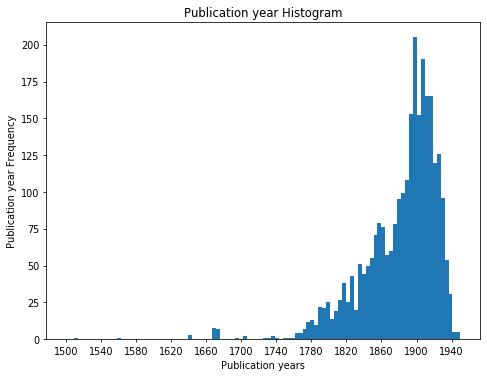

In [69]:
plt.hist(df["year"], bins=100, range=[1500,1950])
plt.gca().set(title='Publication year Histogram',
              xlabel="Publication years",
              ylabel='Publication year Frequency')
plt.xticks(np.arange(1500, 1950, 40))
plt.show()

### Reduce corpus by selection text between 1840 and 1930

In [84]:
criteria = (df["year"] >= 1840) & (df["year"] <= 1930)
rdf = df[criteria]
rdf.head()

,filename,author,title,year,textlength,text
0,Wilhelm_Walloth_-_Das_Schatzhaus_des_Königs_(1...,Wilhelm Walloth,Das Schatzhaus des Königs,1883,105651,Roman aus dem alten Ägypten Und die Ägypter zw...
1,Theodor_Däubler_-_L'Africana_(1928),Theodor Däubler,LAfricana,1928,43258,"L'Africana Roman Horen-Verlag , Berlin-Grunewa..."
2,Max_Eyth_-_Der_Schneider_von_Ulm_(1906),Max Eyth,Der Schneider von Ulm,1906,272961,"[ cover ] Historischer Roman um den Mann , der..."
5,Friedrich_Spielhagen_-_Platt_Land_(1878),Friedrich Spielhagen,Platt Land,1878,205088,"Erstes Buch Erstes Kapitel . Der Wagen hielt ,..."
6,Adalbert_Stifter_-_Ein_Gang_durch_die_Katakomb...,Adalbert Stifter,Ein Gang durch die Katakomben,1844,6351,"Wir sind so gewohnt worden , unsere Voreltern ..."


In [87]:
rdf.shape

(2212, 6)

In [95]:
1 - 2212/2735

0.19122486288848262

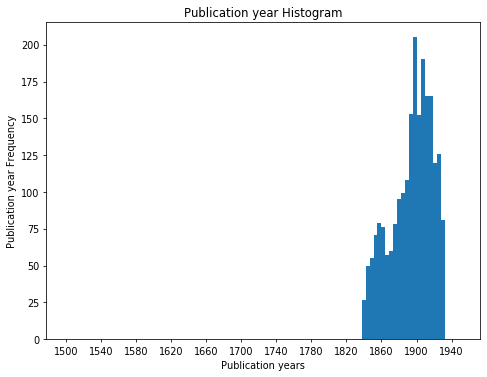

In [85]:
plt.hist(df2["year"], bins=100, range=[1500,1950])
plt.gca().set(title='Publication year Histogram',
              xlabel="Publication years",
              ylabel='Publication year Frequency')
plt.xticks(np.arange(1500, 1950, 40))
plt.show()

### Reduce corpus by critical texts

1. Duplicate: Knigge's "Benjamin Noldmann's Geschichte der Aufklärung in Abyssinien" is contained twice (additional occurrence as part of "Traum des Herrn Brick").

In [117]:
rdf[rdf["author"].str.contains("Adolph Freiherr")]

,filename,author,title,year,textlength,text


2. Duplicate: E.T.A. Hoffmann's "Meister Martin der Küfner und seine Gesellen" is already contained in "Serapions-Brüdern".

In [107]:
rdf[rdf["author"].str.contains("Hoffmann")]

,filename,author,title,year,textlength,text
33,ETA_Hoffmann_-_Letzte_Stücke_(1822),ETA Hoffmann,Letzte Stücke,1822,185727,E. T. A. Hoffmann Vorwort Nachfolgende Briefe ...
193,ETA_Hoffmann_-_Lebensansichten_des_Katers_Murr...,ETA Hoffmann,Lebensansichten des Katers Murr,1819,162366,nebst fragmentarischer Biographie des Kapellme...
241,ETA_Hoffmann_-_Der_Magnetiseur_(1814),ETA Hoffmann,Der Magnetiseur,1814,17209,E.T.A . Hoffmann Eine Familienbegebenheit ( Er...
465,ETA_Hoffmann_-_Die_Serapions-Brüder_(1821),ETA Hoffmann,Die Serapions-Brüder,1821,435937,Gesammelte Erzählungen und Märchen Herausgegeb...
490,ETA_Hoffmann_-_Meister_Martin_der_Küfner_und_s...,ETA Hoffmann,Meister Martin der Küfner und seine Gesellen,1818,25453,"E. T. A. Hoffmann Wohl mag dir auch , geliebte..."
620,ETA_Hoffmann_-_Die_Irrungen_-_Verloren_und_Gef...,ETA Hoffmann,Die Irrungen - Verloren und Gefunden,1820,17158,E.T.A . Hoffmann Die Irrungen Fragment aus dem...
653,ETA_Hoffmann_-_Das_steinerne_Herz_(1817),ETA Hoffmann,Das steinerne Herz,1817,10458,E.T.A . Hoffmann ( Erstdruck ) Jedem Reisenden...
712,ETA_Hoffmann_-_Das_Majorat_(1817),ETA Hoffmann,Das Majorat,1817,33249,E.T.A . Hoffmann Dem Gestade der Ostsee unfern...
795,ETA_Hoffmann_-_Der_Elementargeist_(1819),ETA Hoffmann,Der Elementargeist,1819,18133,E.T.A . Hoffmann Gerade am 20 November des Jah...
850,ETA_Hoffmann_-_Der_Sandmann_(1817),ETA Hoffmann,Der Sandmann,1817,14724,E.T.A . Hoffmann ( Erstdruck ) Nathanael an Lo...


3. Semi-Duplicate: Gottfried Keller's "Der Grüne Heinrich" is contained in two versions. They are, in fact, different, but there's a whole lot of identical passages, too. Depending on your type of research question, this could cause an unevenness.

In [124]:
rdf[rdf["title"].str.contains("grüne Heinrich")]

,filename,author,title,year,textlength,text
1156,Gottfried_Keller_-_Der_grüne_Heinrich._Erste_F...,Gottfried Keller,Der grüne Heinrich Erste Fassung,1854,305052,Der grüne Heinrich . Erste Fassung Vorwort Von...
1893,Gottfried_Keller_-_Der_grüne_Heinrich_(1879),Gottfried Keller,Der grüne Heinrich,1879,288074,Zweite Fassung ( /80 ) Inhalt : • Erster Teil ...


#### Remove "Der grüne Heinrich Erste Fassung"

In [127]:
rdf2 = rdf[rdf["title"] != "Der grüne Heinrich Erste Fassung"] 

In [128]:
rdf2[rdf2["title"].str.contains("grüne Heinrich")]

,filename,author,title,year,textlength,text
1893,Gottfried_Keller_-_Der_grüne_Heinrich_(1879),Gottfried Keller,Der grüne Heinrich,1879,288074,Zweite Fassung ( /80 ) Inhalt : • Erster Teil ...


4. Duplicate: Löns's "Dahinten in der Heide" is contained again in the collection "Aus Forst und Flur".

In [132]:
rdf2[rdf2["title"].str.contains("Dahinten in")]

,filename,author,title,year,textlength,text
1524,Hermann_Löns_-_Dahinten_in_der_Heide_(1909),Hermann Löns,Dahinten in der Heide,1909,40678,Roman Inhalt : Der Ortolan Der Goldammer Der T...


#### Remove "Dahinten in der Heide"

In [133]:
rdf2 = rdf2[rdf2["title"] != "Dahinten in der Heide"] 
rdf2.shape

(2210, 6)

5. Duplicate: Löns's "Der letzte Hansbur", "Das zweite Gesicht", "Die Häuser von Ohlenhof" appear again as part of "Sämtl. Werke Teil 7".

In [140]:
rdf2[rdf2["title"].str.contains("Sämtliche Werke")]

,filename,author,title,year,textlength,text
475,Hermann_Löns_-_Sämtliche_Werke_-_Band_7_(1909),Hermann Löns,Sämtliche Werke - Band 7,1909,185357,"Gesammelte Werke , Band 7 Inhalt Der letzte Ha..."


#### Remove "Sämtliche Werke - Band 7"

In [141]:
rdf2 = rdf2[rdf2["title"] != "Sämtliche Werke - Band 7"]
rdf2.shape

(2209, 6)

6. Non-German Original: Strindberg's "Beichte eines Toren" is not a German original.

In [144]:
rdf2[rdf2["title"].str.contains("Die Beichte eines Thoren")]

,filename,author,title,year,textlength,text
2053,August_Strindberg_-_Die_Beichte_eines_Thoren_(...,August Strindberg,Die Beichte eines Thoren,1895,93173,"Roman 2 . Auflage . Budapest , 1894 . Carl Gri..."


#### Remove "Die Beichte eines Thoren"

In [145]:
rdf2 = rdf2[rdf2["title"] != "Die Beichte eines Thoren"]
rdf2.shape

(2208, 6)

Folgende Kritipunkte sind egal:
- Non-Fiction: Heinrich Heine's "Geständnisse" and his "Reisebilder" would have to be regarded as non-fictional.
- Non-Fiction: Seume's "Spaziergang nach Syrakus" is non-fictional.

## Plot length of texts

### Abb. TODO - Textlängen Histogramm vor der "Normalisierung"

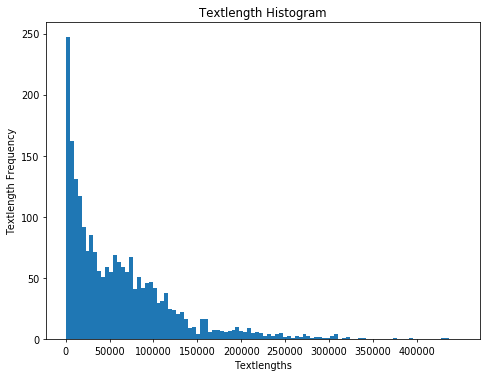

In [148]:
plt.hist(rdf2["textlength"], bins=100, range=[0, 450000])
plt.gca().set(title='Textlength Histogram',
              xlabel="Textlengths",
              ylabel='Textlength Frequency')
plt.xticks(np.arange(0, 450000, 50000))
plt.show()

In [149]:
# TODO: hier weiter, texte normalisieren